In [1]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0, 'python')
from readSent import *
from nicer_plot import *
import pylab as plt
%matplotlib inline
from Dload_Finder import *
from matplotlib import cm
from skimage import exposure
from sklearn import linear_model
import scipy
from scipy import signal
import scipy.stats
import scipy.ndimage as ndimage
from fastRWpkl import *
from scipy.stats import gaussian_kde
from matplotlib import *
import pandas as pd
from scipy import interpolate
from applied import *
from Py6S import *
from smoothn import *
from scipy.interpolate import griddata
from skimage import exposure

In [3]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)
keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]
i=11
fpath = sfiles[i]
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = np.mean(atmos['TCO3']*46.728972)
water = np.mean(atmos['TCWV']/10.)
print water, ozone
mete = readxml(fpath+'metadata.xml')
sz = mete['mSz']
sa = mete['mSa']
vz = mete['mVz']
va = mete['mVa']

0.510586465435 0.371318171103


In [4]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160101_161231_SONET_Xingtai.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas][1:20]
aero = np.array(date.AOT_1640),np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [1640, 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

Date(dd-mm-yyyy) Time(hh:mm:ss)  Julian_Day  AOT_1640  AOT_1020   AOT_870  \
1        01:05:2016       08:07:27  122.338507  0.220150  0.284628  0.319250   
2        02:05:2016       22:49:23  123.950961  0.036250  0.049234  0.053598   
3        02:05:2016       23:13:24  123.967639  0.035842  0.048320  0.052665   
4        03:05:2016       00:07:15  124.005035  0.031110  0.042359  0.047588   
5        03:05:2016       00:37:15  124.025868  0.029541  0.039815  0.045460   
6        03:05:2016       01:22:19  124.057164  0.031955  0.041477  0.047839   
7        03:05:2016       07:22:17  124.307141  0.081640  0.090919  0.101287   
8        03:05:2016       08:37:27  124.359340  0.091557  0.102394  0.111964   
9        03:05:2016       09:32:01  124.397234  0.097034  0.110542  0.120147   
10       03:05:2016       10:06:10  124.420949  0.102942  0.117834  0.126913   
11       03:05:2016       22:46:36  124.949028  0.110888  0.134589  0.139996   
12       03:05:2016       23:13:34  124.967755  0.116685  0.139560  0.145124   
13       04:05:2016       00:35:09  125.024410  0.134425  0.161914  0.171037   
14       04:05:2016       01:22:17  125.057141  0.133215  0.161657  0.173427   
15       06:05:2016       07:22:28  127.307269  0.443322  0.534719  0.560262   
16       06:05:2016       08:10:29  127.340613  0.485542  0.573484  0.600697   
17       08:05:2016       10:08:05  129.422280  0.175113  0.229794  0.250791   
18       10:05:2016       00:31:16  131.021713  0.135794  0.251526  0.318122   
19       10:05:2016       01:22:21  131.057187  0.139155  0.256930  0.326630   

     AOT_675  AOT_667  AOT_555  AOT_551  AOT_532  AOT_531   AOT_500  AOT_490  \
1   0.388652      NaN      NaN      NaN      NaN      NaN  0.495654      NaN   
2   0.066140      NaN      NaN      NaN      NaN      NaN  0.081342      NaN   
3   0.065162      NaN      NaN      NaN      NaN      NaN  0.078453      NaN   
4   0.060134      NaN      NaN      NaN      NaN      NaN  0.066739      NaN   
5   0.058063      NaN      NaN      NaN      NaN      NaN  0.062091      NaN   
6   0.060413      NaN      NaN      NaN      NaN      NaN  0.060192      NaN   
7   0.118541      NaN      NaN      NaN      NaN      NaN  0.135848      NaN   
8   0.129180      NaN      NaN      NaN      NaN      NaN  0.155331      NaN   
9   0.141056      NaN      NaN      NaN      NaN      NaN  0.180543      NaN   
10  0.147866      NaN      NaN      NaN      NaN      NaN  0.190915      NaN   
11  0.154928      NaN      NaN      NaN      NaN      NaN  0.181862      NaN   
12  0.159921      NaN      NaN      NaN      NaN      NaN  0.183771      NaN   
13  0.188556      NaN      NaN      NaN      NaN      NaN  0.208635      NaN   
14  0.191969      NaN      NaN      NaN      NaN      NaN  0.211559      NaN   
15  0.609671      NaN      NaN      NaN      NaN      NaN  0.681650      NaN   
16  0.653264      NaN      NaN      NaN      NaN      NaN  0.736953      NaN   
17  0.295409      NaN      NaN      NaN      NaN      NaN  0.378927      NaN   
18  0.471194      NaN      NaN      NaN      NaN      NaN  0.708348      NaN   
19  0.483760      NaN      NaN      NaN      NaN      NaN  0.725683      NaN   

    AOT_443   AOT_440  AOT_412   AOT_380   AOT_340  Water(cm)  
1       NaN  0.556775      NaN  0.629571  0.683198   2.205320  
2       NaN  0.092938      NaN  0.103768  0.108139   0.585605  
3       NaN  0.089494      NaN  0.099779  0.104116   0.569468  
4       NaN  0.076337      NaN  0.084082  0.091142   0.511909  
5       NaN  0.071493      NaN  0.078761  0.077383   0.486975  
6       NaN  0.069243      NaN  0.075497  0.070629   0.447453  
7       NaN  0.152733      NaN  0.174680  0.192274   0.760989  
8       NaN  0.176462      NaN  0.202620  0.220729   0.824685  
9       NaN  0.208450      NaN  0.244123  0.268813   0.877700  
10      NaN  0.219997      NaN  0.256489  0.279838   0.903077  
11      NaN  0.201206      NaN  0.222006  0.231482   1.120504  
12      NaN  0.201428      NaN  0

In [5]:
sen_rsp = pd.ExcelFile('sp_rep/Sentbands.xlsx')
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8', 'SR_AV_B8A', 'SR_AV_B11', 'SR_AV_B12'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

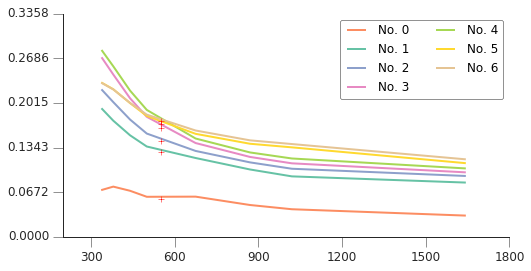

In [188]:
aot550 = []
plot_config()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for i,j in enumerate(aero):
    ax.plot(wv, j, label = 'No. %s'%i)
    f = interpolate.interp1d(wv,j, kind='cubic')
    xnew = 550
    ynew = f(xnew)
    aot550.append(ynew)
    plt.plot(550, ynew, 'r+')
pretty_axes(ax)  
ax.set_yticks(np.linspace(0, 1.2*np.max(aero), 6))
plt.legend(ncol=2)

In [189]:
aot550

[array(0.057471480787990546),
 array(0.12735285990289918),
 array(0.14364615438401096),
 array(0.16419135037848276),
 array(0.1734720605027159),
 array(0.17043786085775892),
 array(0.17365157452923824)]

In [7]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)

keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]

for i in [8, 11, 15, 17]:
    
    print sfiles[i],'\n', mfiles[i], '\n'

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/13/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016105.h27v05.005.2016122100738.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016105.h27v05.005.2016122100739.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016121.h27v05.005.2016140192730.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016121.h27v05.005.2016140192731.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/12/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016161.h27v05.005.2016183110712.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016161.h27v05.005.2016183110712.hdf'] 

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/22/0/ 
[ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016177.h27v05.005.2016194191852.hdf'
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016177.h27v05.005.2016194191852.hdf'] 



In [8]:
psf = [[  24.78162257,  319.75603031,    7.60898016,  -20.44817067, 61.27414215],
[  24.98695115,  312.02695267,    7.9308606 ,  -21.20931201, 59.01870048],
[  23.97447645,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  24.41782056,  306.04039495,    7.97986228,  -22.27513358, 59.27710844],
[  24.41736189,  308.74673509,    7.87068097,  -21.64732953, 61.26454941],
[  23.97447188,  306.15258185,    7.91598248,  -21.56165644, 59.7537709 ],
[  24.02092481,  304.79130493,    8.01491173,  -20.96258739, 59.98666719]]

In [9]:
fpath = '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/'
mfile = [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016121.h27v05.005.2016140192730.hdf',
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016121.h27v05.005.2016140192731.hdf']

In [10]:
to_regs = applied(lat, lon, fpath, mfile, psf)


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/ (2, 3, 4, 8, 11, 12, 13)
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  121 
Location:  50SKG
Cloud proportion:  0.0217098649308


In [11]:
to_regs

[[2,
  array([  77,   78,   79, ..., 9922, 9923, 9925]),
  array([8207, 8253, 8300, ..., 4537, 4584, 4630]),
  array([ 0.12587852,  0.11918578,  0.11095867, ...,  0.10127359,
          0.09500532,  0.09336921]),
  masked_array(data = [0.046 0.036000000000000004 0.028 ..., 0.04124930406396476
   0.03158813405162911 0.027609731044699107],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [3,
  array([  76,   77,   78, ..., 9922, 9924, 9925]),
  array([8205, 8251, 8298, ..., 4582, 4628, 4675]),
  array([ 0.11749805,  0.11069003,  0.10239213, ...,  0.09096375,
          0.08855249,  0.09113445]),
  masked_array(data = [0.07100000000000001 0.07100000000000001 0.054 ..., 0.06636647265447104
   0.062046686144838215 0.06338806964754103],
               mask = [False False False ..., False False False],
         fill_value = 1e+20)],
 [4,
  array([  75,   76,   77, ..., 9921, 9923, 9924]),
  array([8206, 8252, 8299, ..., 4583, 4629, 4676]),
  arra

In [13]:
indx, indy = to_regs[0][1], to_regs[0][2]
m, s = to_regs[0][3], to_regs[0][4]
to_reg = [[i[3], i[4]] for i in to_regs]

In [16]:
def atm(p,sref = None, sen_rsr = None, band = None, angles = None):

    aot550, water, ozone = p

    print p

    sa,sz, va, vz = angles

    path = '/home/ucfafyi/DATA/Downloads/6SV2.1/sixsV2.1'

    s = SixS(path)

    ss = []

    

    s = SixS(path)

    s.altitudes.set_target_sea_level()

    s.altitudes.set_sensor_satellite_level()

    s.ground_reflectance = GroundReflectance.HomogeneousLambertian(GroundReflectance.GreenVegetation)

    s.geometry = Geometry.User()

    s.geometry.solar_a = sa

    s.geometry.solar_z = sz

    s.geometry.view_a = va[band]

    s.geometry.view_z = vz[band]

    srsp = sen_rsr[band]

    wv, we = swl[srsp!=0]/1000.,srsp[srsp!=0]

    mi,ma = round(wv.min(),3),round(wv.max(),3)

    f = interpolate.interp1d(wv,we)

    xnew = np.arange(mi,ma,0.0025)

    ynew = f(xnew)

    s.wavelength = Wavelength(xnew[0],xnew[-1],ynew)

    s.aero_profile = AeroProfile.PredefinedType(AeroProfile.Continental)

    s.aot550 = aot550

    s.atmos_profile = AtmosProfile.UserWaterAndOzone(water, ozone)

    s.atmos_corr = AtmosCorr.AtmosCorrLambertianFromReflectance(sref)

    s.run()

    return s.outputs.atmos_corrected_reflectance_lambertian

In [66]:
def cost(p, args = None):
    if any(p>1) or any(p<0):
        return 10000
    else:
        sref, mref, sen_rsr , band , angles = args
        ss = atm(p, sref = sref, sen_rsr = sen_rsr, band = band, angles = angles)
        cost = abs(mref-ss)
        return cost

In [19]:
indx, indy

(array([  77,   78,   79, ..., 9922, 9923, 9925]),
 array([8207, 8253, 8300, ..., 4537, 4584, 4630]))

In [21]:
tx = mgrs.MGRS()
cord = tx.toMGRS(37.18194, 114.36, MGRSPrecision=4)

In [26]:
cord

'50SKG65641832'

In [41]:
arr = np.zeros((10000, 10000))
arr[7500:8500, 6000:7000] = 1
y,x = int(cord[-8:-4]),10000-int(cord[-4:])
x,y

(8168, 6564)

In [699]:
cord

'50SKG65641832'

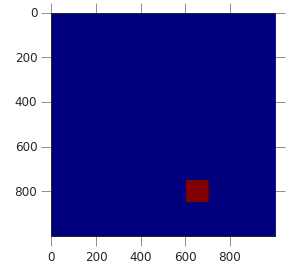

In [42]:
plt.imshow(arr[::10,::10])

In [78]:
parallel_rw_pkl(to_regs, '50SKGto_regs', 'w')

Length of data: 7
Length of data: 7


In [45]:
ms = (indx>7500)&(indx<8500)&(indy>6000)&(indy<7000)
aoix, aoiy = indx[ms], indy[ms]

In [ ]:
aoi = np.where(ms)

449

In [73]:
p = np.array([0.09,0.510586465435, 0.371318171103])
up = np.array([1,1,1])
down = np.array([0, 0, 0])
bounds = np.array([down, up])

solved = []
def opt(i):
    args = to_regs[0][3][aoi[0][i]], to_regs[0][4][aoi[0][i]], sen_rsr,0, [sa,sz, va, vz]
    psolve = optimize.fmin(cost,p, full_output=1, args=(args,))
    return [aoix[i], aoiy[i],psolve]

In [ ]:
opt(100)

In [102]:
parallel_rw_pkl(retval, '2308retval', 'w')

Length of data: 449
Length of data: 35


In [6]:
retval = parallel_rw_pkl(None, '2308retval', 'r')

In [9]:
retval[0][2]
plot_config()

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


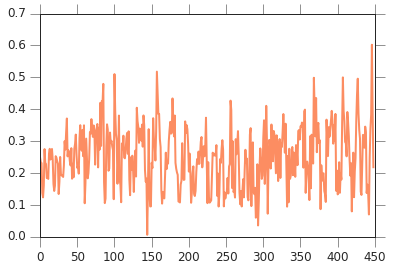

In [10]:
plt.plot([i[2][0][0] for i in retval])

In [11]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in retval]).T

In [12]:
aerosols

array([[  7.51300000e+03,   7.51500000e+03,   7.51600000e+03, ...,
          8.49400000e+03,   8.49600000e+03,   8.49800000e+03],
       [  6.03800000e+03,   6.08500000e+03,   6.13100000e+03, ...,
          6.36700000e+03,   6.41300000e+03,   6.50600000e+03],
       [  2.48470857e-01,   2.33738493e-01,   2.31201025e-01, ...,
          6.02278037e-01,   3.91710250e-01,   2.18294672e-01]])

In [13]:
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-7500).astype(int), (aerosols[1]-6001).astype(int)] = aerosols[2]

In [14]:
weights = ((~np.isnan(aero_map)).astype('float'))

In [15]:
weights

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:
sm_aaro = smoothn(aero_map,s=20,W=weights, verbose=True, isrobust=True)

./python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
./python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


tol 1.0 nit 0
tol 2.3368089443 nit 1
tol 2.20493696658 nit 2
tol 2.14395823503 nit 3
tol 1.74736889847 nit 4
tol 1.48475182218 nit 5
tol 1.05525641898 nit 6
tol 0.790256651209 nit 7
tol 0.548507606618 nit 8
tol 0.39319506106 nit 9
tol 0.28046603087 nit 10
tol 0.201653105775 nit 11
tol 0.151098989922 nit 12
tol 0.11297792426 nit 13
tol 0.0912616294523 nit 14
tol 0.0735870171882 nit 15
tol 0.0646278311872 nit 16
tol 0.0564484164782 nit 17
tol 0.052427660437 nit 18
tol 0.0482024276592 nit 19
tol 0.0458816920333 nit 20
tol 0.0432622193356 nit 21
tol 0.0415529819744 nit 22
tol 0.0396558756471 nit 23
tol 0.0382303523111 nit 24
tol 0.0367204919633 nit 25
tol 0.0354770756548 nit 26
tol 0.034212967251 nit 27
tol 0.0331123017555 nit 28
tol 0.0320240106517 nit 29
tol 0.0310438328983 nit 30
tol 0.0300909014954 nit 31
tol 0.0292144467363 nit 32
tol 0.0283703861833 nit 33
tol 0.0275835971419 nit 34
tol 0.0268295297942 nit 35
tol 0.0261203705583 nit 36
tol 0.0254420753956 nit 37
tol 0.0248002650484 n

In [113]:
sm_aaro

(array([[ 0.01785891,  0.0178945 ,  0.01796559, ...,  0.00337167,
          0.00335566,  0.00334763],
        [ 0.01785728,  0.01789285,  0.01796388, ...,  0.00338429,
          0.00336822,  0.00336016],
        [ 0.01785406,  0.01788958,  0.0179605 , ...,  0.00340947,
          0.00339328,  0.00338516],
        ..., 
        [ 0.0093088 ,  0.00933041,  0.00937358, ...,  0.02090384,
          0.0209113 ,  0.02091502],
        [ 0.00927441,  0.00929611,  0.00933947, ...,  0.02085351,
          0.020861  ,  0.02086474],
        [ 0.00925722,  0.00927897,  0.00932242, ...,  0.02082831,
          0.02083581,  0.02083955]]),
 20.000000000000004,
 False,
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

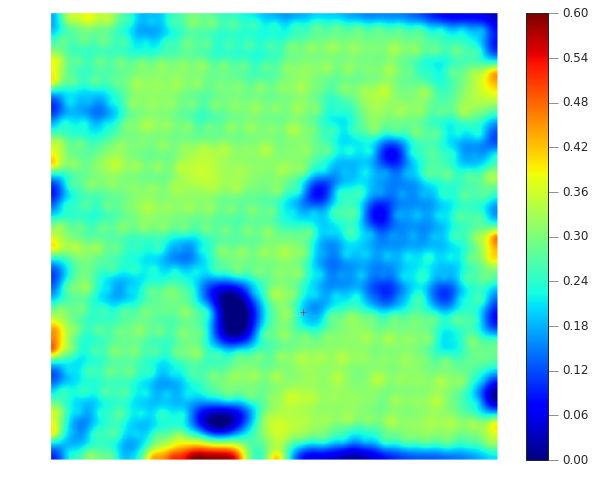

In [49]:
vmax=0.6; vmin=0
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None', vmax=vmax, vmin=vmin)
plt.plot( 6564-6000,8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [43]:
sm_aaro[0][8168-7500, 6564-6000]*10

0.1992312072357276

In [44]:
points = np.array([(aerosols[0]-7500).astype(int), (aerosols[1]-6000).astype(int)]).T

In [45]:
values = aerosols[2]

In [46]:
grid_x, grid_y = np.mgrid[0:1000, 0:1000]
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

(-0.5, 999.5, 999.5, -0.5)

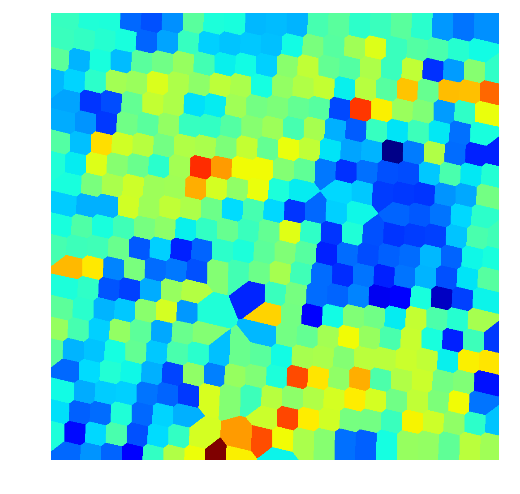

In [175]:
plt.figure(figsize=(10,8))
plt.imshow(grid_z0, vmax=vmax, vmin=vmin)
#plt.colorbar()
plt.axis('off')

In [173]:
sm_a = smoothn(grid_z0,s=10, verbose=True, isrobust=True)

tol 1.0 nit 0
tol 1 nit 0
tol 0.0143513358231 nit 1
tol 0.00568680649458 nit 2
tol 0.00256780191856 nit 3
tol 0.00135465594871 nit 4


In [56]:
sm_a

(array([[ 0.24841404,  0.24841402,  0.24841397, ...,  0.16035333,
          0.1603539 ,  0.16035419],
        [ 0.24841241,  0.24841238,  0.24841233, ...,  0.16035361,
          0.16035418,  0.16035446],
        [ 0.24840921,  0.24840918,  0.24840912, ...,  0.16035416,
          0.16035473,  0.16035502],
        ..., 
        [ 0.13482234,  0.13482309,  0.13482473, ...,  0.32786287,
          0.32786678,  0.32786871],
        [ 0.13474024,  0.13474197,  0.13474554, ...,  0.32786568,
          0.32786958,  0.3278715 ],
        [ 0.13470099,  0.13470319,  0.13470772, ...,  0.32786712,
          0.32787102,  0.32787294]]),
 29.999999999999996,
 True,
 array([[ 0.99999633,  0.99999633,  0.99999632, ...,  0.99999961,
          0.99999963,  0.99999965],
        [ 0.99999612,  0.99999611,  0.99999611, ...,  0.99999962,
          0.99999964,  0.99999966],
        [ 0.99999568,  0.99999568,  0.99999567, ...,  0.99999964,
          0.99999967,  0.99999968],
        ..., 
        [ 0.99363096,  0

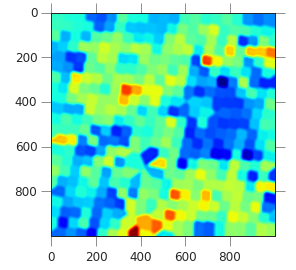

In [174]:
plt.imshow(sm_a[0])

In [139]:
img = ndimage.gaussian_filter(sm_aaro[0]*10, sigma=(50, 50), order=0)

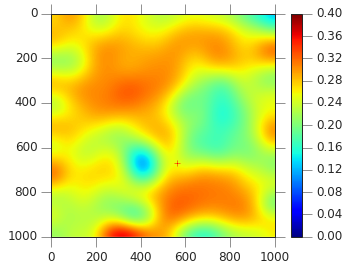

In [140]:
plt.imshow(img, vmin=0, vmax=0.4)
plt.plot(6564-6000, 8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.colorbar()

In [19]:
b2 = gdal.Open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/B02.jp2').ReadAsArray()

In [20]:
b3 = gdal.Open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/B03.jp2').ReadAsArray()
b4 = gdal.Open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/B04.jp2').ReadAsArray()

In [22]:
b8 = gdal.Open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/B08.jp2').ReadAsArray()

In [21]:
rgb = np.zeros((10980, 10980,3))

In [38]:
rgb = np.zeros((10980, 10980,3))
rgb[:,:,0] = b4
rgb[:,:,1] = b3
rgb[:,:,2] = b2

(1000, 0)

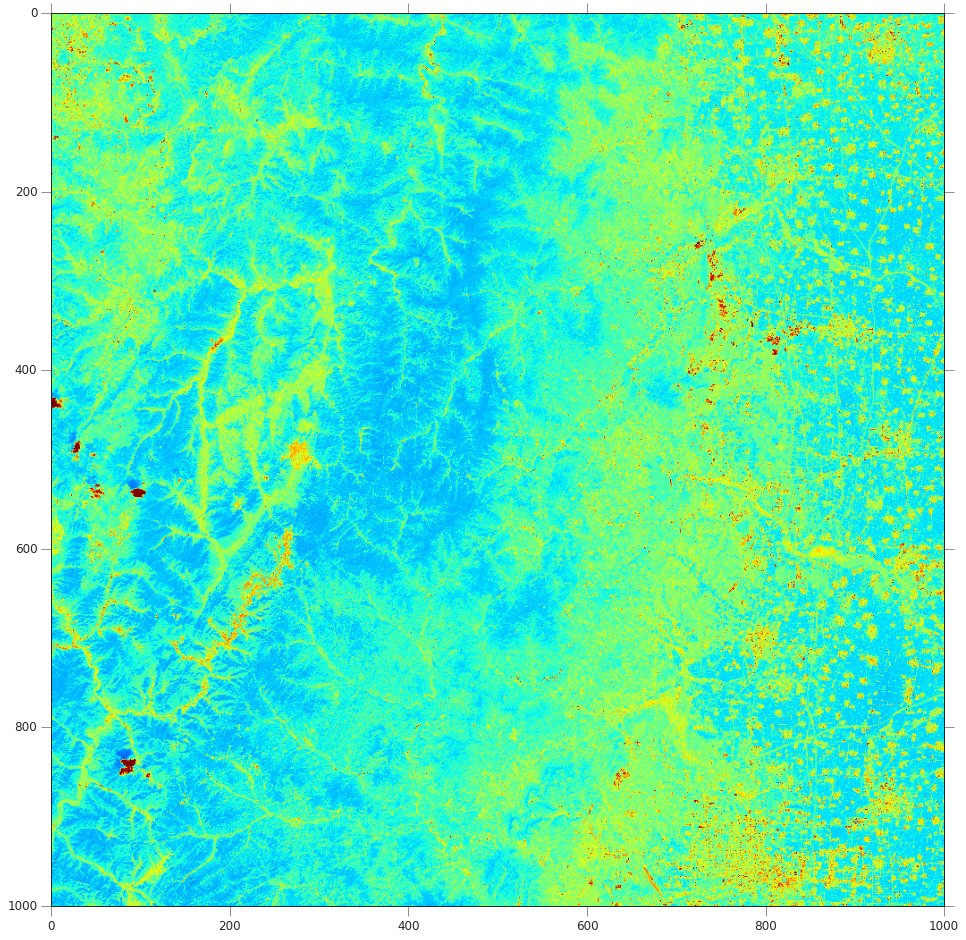

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(b2[::10,::10]*0.0001,vmin=0, vmax=0.25)
plt.plot(6564/10,1000-1832/10, 'r+' )
plt.xlim(0,1000)
plt.ylim(1000,0)

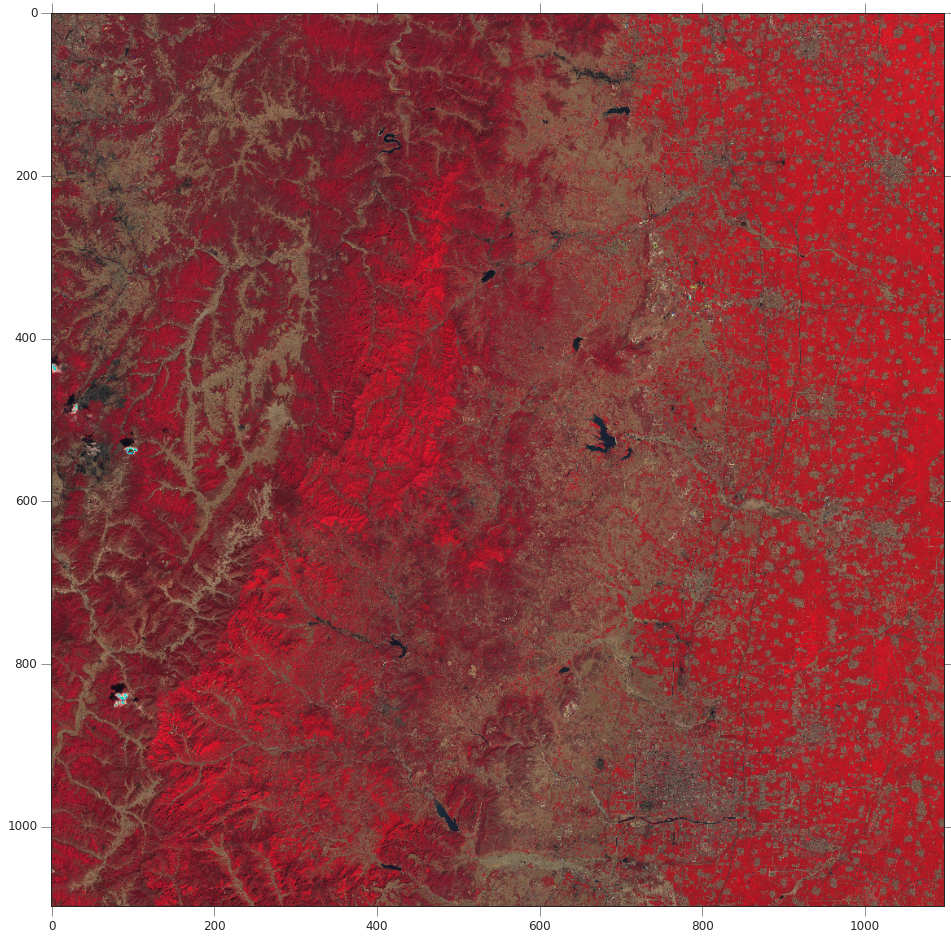

In [29]:
plt.figure(figsize=(16,16))
plt.imshow(rgb[::10,::10]*0.0001*2.)

In [39]:
patch = (rgb[7500:8500, 6000:7000, :]*0.0001).copy()

(0.0, 1000.0, 1000.0, 0.0)

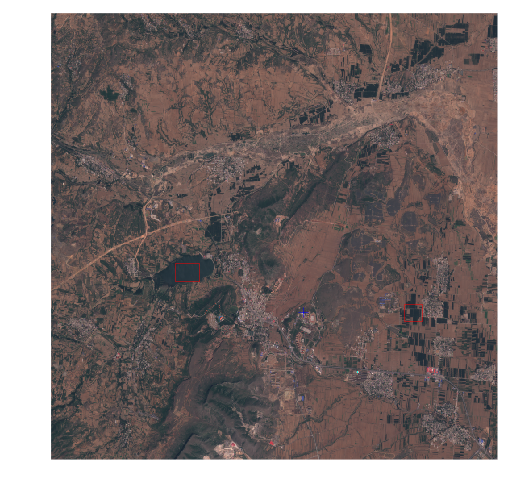

In [131]:
import matplotlib.patches as patches
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(patch*2.5, interpolation='None')
plt.plot(6564-6000, 8168-7500, 'b+', markersize=10)
plt.xlim(0,1000)
plt.ylim(1000,0)
ax.add_patch(patches.Rectangle((277, 560),53,40,fill=False, edgecolor='r'))
ax.add_patch(patches.Rectangle((790, 650),40,40,fill=False, edgecolor='r'))
plt.axis('off')

In [802]:
img[8168-7500, 6564-6000]
560:600, 277:330

0.19980558697870351

(0.0, 1000.0, 1000.0, 0.0)

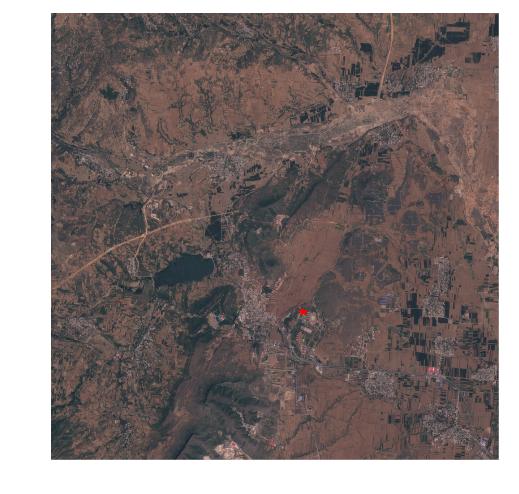

In [97]:
patch2 = (rgb[7500:8500, 6000:7000, : ]*0.0001).copy()
plt.figure(figsize=(8,8))
plt.imshow(patch2*2.5, cmap = 'Greys')
plt.plot(6564-6000, 8168-7500, 'r*', markersize=10, mew=0)
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')

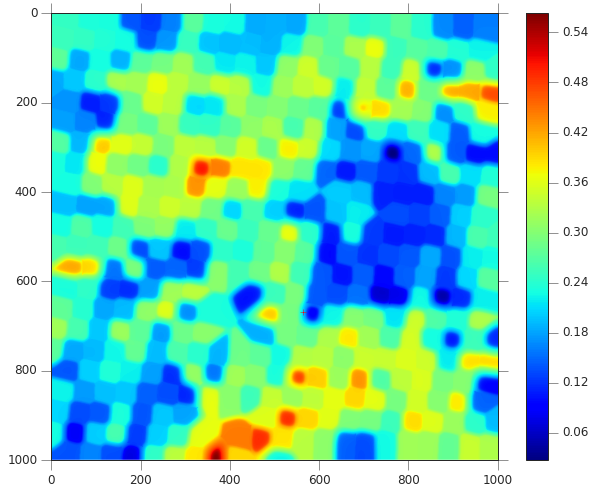

In [859]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0])
plt.plot( 6564-6000,8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.colorbar()

In [895]:
sm_aaro[0][8168-7500, 6564-6000], grid_z0[8168-7500, 6564-6000]

(0.19653599972771441, 0.072541975629880656)

In [849]:
sm_aaro[0].mean()

0.25041836255474631

In [832]:
hour = [1.5,7.5,8.5,9.5,10, 22.5,23.2]

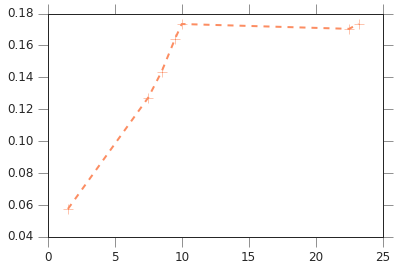

In [841]:
plt.plot(np.array(hour), np.array(aot550), '--+', markersize=10)

In [846]:
np.array(aot550)[:-2]

array([ 0.05747148,  0.12735286,  0.14364615,  0.16419135,  0.17347206])

In [844]:
r = linregress(hour[:-2], np.array(aot550)[:-2])
r.rvalue

0.99298413038244393

In [857]:
11.25*r.slope+r.intercept

0.18441004437388758

In [853]:
print open('/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/tileInfo.json', 'rb').read()

{
  "path" : "tiles/50/S/KG/2016/5/3/0",
  "timestamp" : "2016-05-03T03:16:31.459Z",
  "utmZone" : 50,
  "latitudeBand" : "S",
  "gridSquare" : "KG",
  "datastrip" : {
    "id" : "S2A_OPER_MSI_L1C_DS_MTI__20160503T083156_S20160503T031631_N02.01",
    "path" : "products/2016/5/3/S2A_OPER_PRD_MSIL1C_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631/datastrip/0"
  },
  "tileGeometry" : {
    "type" : "Polygon",
    "crs" : {
      "type" : "name",
      "properties" : {
        "name" : "urn:ogc:def:crs:EPSG:8.8.1:32650"
      }
    },
    "coordinates" : [ [ [ 199980.0, 4200000.0 ], [ 309780.0, 4200000.0 ], [ 309780.0, 4090200.0 ], [ 199980.0, 4090200.0 ], [ 199980.0, 4200000.0 ] ] ]
  },
  "tileDataGeometry" : {
    "type" : "Polygon",
    "crs" : {
      "type" : "name",
      "properties" : {
        "name" : "urn:ogc:def:crs:EPSG:8.8.1:32650"
      }
    },
    "coordinates" : [ [ [ 199981.0, 4199999.0 ], [ 309779.0, 4199999.0 ], [ 309779.0, 4090201.0 ], [ 199981.0, 4090201.

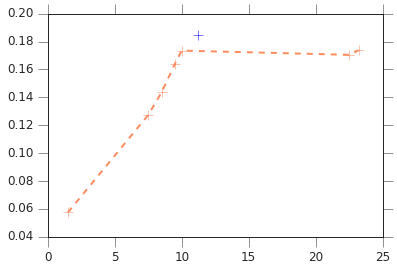

In [864]:
plt.plot(np.array(hour), np.array(aot550), '--+', markersize=10)
plt.plot(11.25, 0.18441004437388758, 'b+', markersize=10)

In [71]:
water = np.array([[i[0], i[1], i[2][0][1]] for i in retval]).T

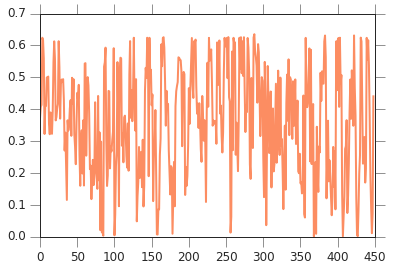

In [72]:
plt.plot(water[2])b

In [74]:
water

array([[  7.51300000e+03,   7.51500000e+03,   7.51600000e+03, ...,
          8.49400000e+03,   8.49600000e+03,   8.49800000e+03],
       [  6.03800000e+03,   6.08500000e+03,   6.13100000e+03, ...,
          6.36700000e+03,   6.41300000e+03,   6.50600000e+03],
       [  3.74705084e-01,   4.08289764e-01,   4.13696233e-01, ...,
          1.14040415e-02,   7.36522119e-02,   4.40537576e-01]])

In [137]:
w_map = np.zeros((1000, 1000))
w_map[:,:] = np.nan
w_map[(water[0]-7500).astype(int), (water[1]-6001).astype(int)] = water[2]

In [925]:
retval[0][2][0]

array([ 0.24847086,  0.37470508,  0.00814581])

In [937]:
grid_x, grid_y = np.mgrid[0:1000, 0:1000]
grid_w = griddata(points, water[2], (grid_x, grid_y), method='nearest')

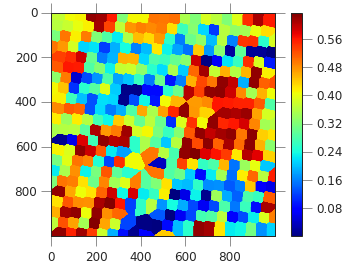

In [938]:
plt.imshow(grid_w)
plt.colorbar()

In [138]:
sm_w = smoothn(w_map,s=20, isrobust=True)

In [77]:
sm_w

(array([[ 0.02881015,  0.02887773,  0.0290127 , ...,  0.01256223,
          0.01251748,  0.01249506],
        [ 0.02880349,  0.02887102,  0.02900589, ...,  0.01259128,
          0.01254643,  0.01252396],
        [ 0.02879023,  0.02885766,  0.02899232, ...,  0.01264926,
          0.01260421,  0.01258163],
        ..., 
        [ 0.03071378,  0.03077424,  0.03089507, ...,  0.01351906,
          0.01353436,  0.01354201],
        [ 0.03067446,  0.03073508,  0.0308562 , ...,  0.01340762,
          0.01342296,  0.01343063],
        [ 0.03065483,  0.03071553,  0.03083681, ...,  0.01335183,
          0.01336719,  0.01337487]]),
 20.000000000000004,
 False,
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))

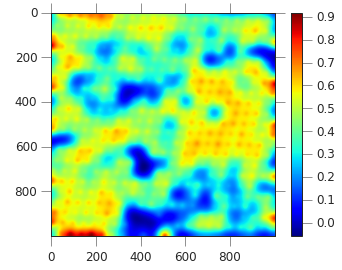

In [139]:
plt.imshow(sm_w[0]*10)
plt.colorbar()

In [987]:
sm_w[0][8168-7500, 6564-6000]

0.45398043319255466

In [962]:
sm_w[0].mean()

0.36500111323310214

In [155]:
ozone = np.array([[i[0], i[1], i[2][0][2]] for i in retval]).T

In [156]:
grid_o = griddata(points, ozone[2], (grid_x, grid_y), method='nearest')

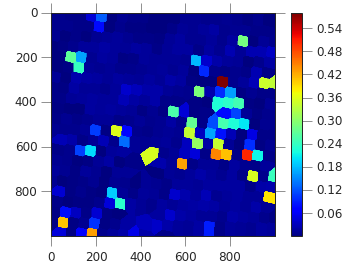

In [157]:
plt.imshow(grid_o)
plt.colorbar()

In [158]:
o_map = np.zeros((1000, 1000))
o_map[:,:] = np.nan
o_map[(ozone[0]-7500).astype(int), (ozone[1]-6001).astype(int)] = ozone[2]

In [159]:
weights = ((~np.isnan(o_map))).astype('float')

In [160]:
sm_o = smoothn(o_map,s=20, W=weights, isrobust=True)

In [161]:
sm_o

(array([[  6.55923909e-04,   6.57723153e-04,   6.61316233e-04, ...,
          -4.91270850e-05,  -4.99534103e-05,  -5.03669067e-05],
        [  6.55814298e-04,   6.57612165e-04,   6.61202501e-04, ...,
          -4.87803344e-05,  -4.96084012e-05,  -5.00227703e-05],
        [  6.55597601e-04,   6.57392706e-04,   6.60977541e-04, ...,
          -4.80882129e-05,  -4.89197602e-05,  -4.93358731e-05],
        ..., 
        [  4.35425704e-04,   4.44657566e-04,   4.63088250e-04, ...,
           1.42458497e-03,   1.42500971e-03,   1.42522098e-03],
        [  4.17549582e-04,   4.26770549e-04,   4.45179479e-04, ...,
           1.41963358e-03,   1.42006435e-03,   1.42027868e-03],
        [  4.08598733e-04,   4.17814247e-04,   4.36212291e-04, ...,
           1.41715084e-03,   1.41758460e-03,   1.41780045e-03]]),
 20.000000000000004,
 False,
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0., 

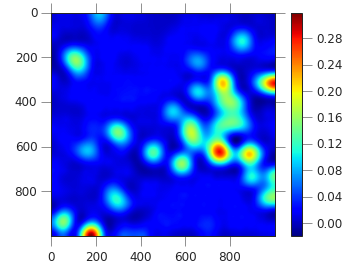

In [162]:
plt.imshow(sm_o[0]*10)
plt.colorbar()

In [163]:
sm_o[0].mean()

0.0033909117666504622

In [58]:
base = '/home/ucfafyi/DATA/Sentinel/S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m'

In [59]:
ls '/home/ucfafyi/DATA/Sentinel/S2A_USER_PRD_MSIL2A_PDMC_20160503T130352_R075_V20160503T031631_20160503T031631.SAFE/GRANULE/S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_N02.01/IMG_DATA/R10m'

S2A_USER_AOT_L2A_TL_MTI__20160503T083156_A004505_T50SKG_10m.jp2
S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B02_10m.jp2
S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B03_10m.jp2
S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B04_10m.jp2
S2A_USER_MSI_L2A_TL_MTI__20160503T083156_A004505_T50SKG_B08_10m.jp2
S2A_USER_WVP_L2A_TL_MTI__20160503T083156_A004505_T50SKG_10m.jp2


In [60]:
Sen_aot = gdal.Open(base+'/S2A_USER_AOT_L2A_TL_MTI__20160503T083156_A004505_T50SKG_10m.jp2').ReadAsArray()

In [61]:
Sen_wat = gdal.Open(base+'/S2A_USER_WVP_L2A_TL_MTI__20160503T083156_A004505_T50SKG_10m.jp2').ReadAsArray()

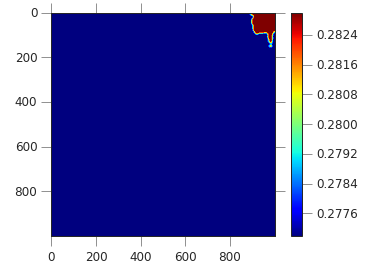

In [82]:
plt.imshow((Sen_aot/1000.)[7500:8500, 6000:7000])
plt.colorbar()

In [83]:
senaotpatch = (Sen_aot/1000.)[7500:8500, 6000:7000]

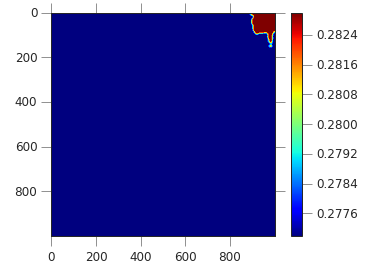

In [84]:
plt.imshow(senaotpatch)
plt.colorbar()

In [85]:
senaotpatch[8168-7500, 6564-6000]

0.27700000000000002

In [86]:
senwatpatch = (Sen_wat/1000.)[7500:8500, 6000:7000]

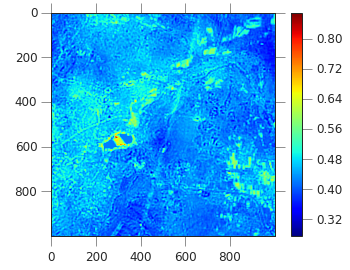

In [87]:
plt.imshow(senwatpatch)
plt.colorbar()

In [166]:
senwatpatch[8168-7500, 6564-6000], sm_w[0][8168-7500, 6564-6000]

(0.38800000000000001, 0.049057885765152312)

In [164]:
senwatpatch.mean(), sm_w[0].mean()

(0.44530706699999972, 0.041192471113772597)

In [165]:
senaotpatch.mean(), sm_aaro[0].mean()

(0.27706514800000037, 0.025577262806963638)

In [168]:
fpath = '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/'
atmos = readmeteo(fpath+'auxiliary/ECMWFT')
ozone = atmos['TCO3']*4.6728972
water = atmos['TCWV']/10.

#ozone = np.mean(atmos['TCO3'])
#water = np.mean(atmos['TCWV'])

In [169]:
senozo = atmos['TCO3']*4.6728972

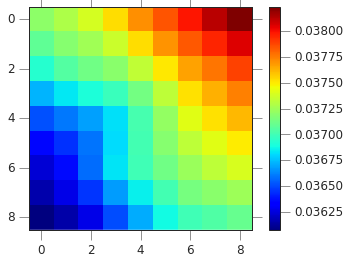

In [170]:
plt.imshow(senozo, interpolation='None')
plt.colorbar()

In [172]:
senozo[8, 6], senozo[8,7], sm_o[0].mean()*10

(0.037004004880169035, 0.037046201626387242, 0.033909117666504625)

In [67]:
sm_aaro[0]

array([[ 0.01785891,  0.0178945 ,  0.01796559, ...,  0.00337167,
         0.00335566,  0.00334763],
       [ 0.01785728,  0.01789285,  0.01796388, ...,  0.00338429,
         0.00336822,  0.00336016],
       [ 0.01785406,  0.01788958,  0.0179605 , ...,  0.00340947,
         0.00339328,  0.00338516],
       ..., 
       [ 0.0093088 ,  0.00933041,  0.00937358, ...,  0.02090384,
         0.0209113 ,  0.02091502],
       [ 0.00927441,  0.00929611,  0.00933947, ...,  0.02085351,
         0.020861  ,  0.02086474],
       [ 0.00925722,  0.00927897,  0.00932242, ...,  0.02082831,
         0.02083581,  0.02083955]])

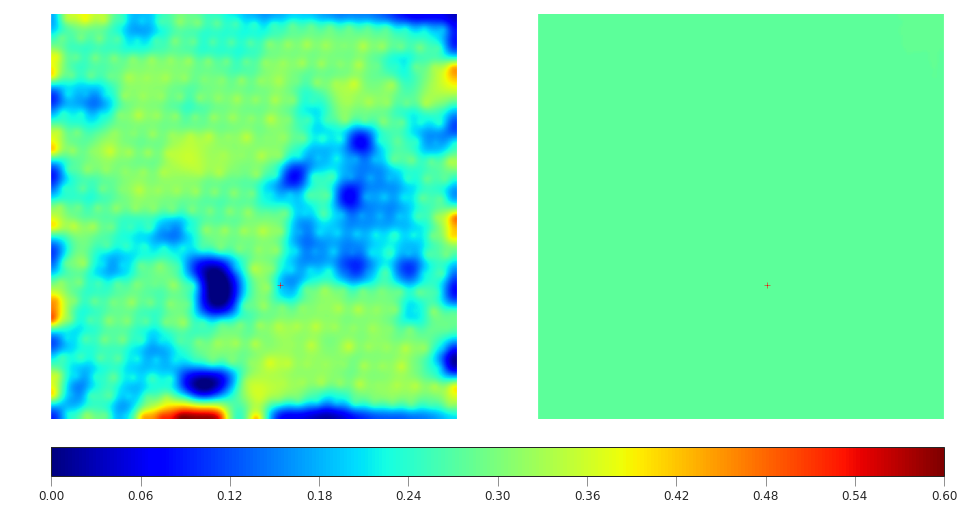

In [93]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(sm_aaro[0]*10, vmax = 0.6, vmin=0.0, interpolation='None')
plt.plot( 6564-6000,8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
ax2 = fig.add_subplot(1,2,2)
im = ax2.imshow(senaotpatch, vmax = 0.6, vmin = 0.0, interpolation='None')
plt.plot( 6564-6000,8168-7500, 'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
ax1.axis('off')
ax2.axis('off')
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.125, 0.05, 0.775, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

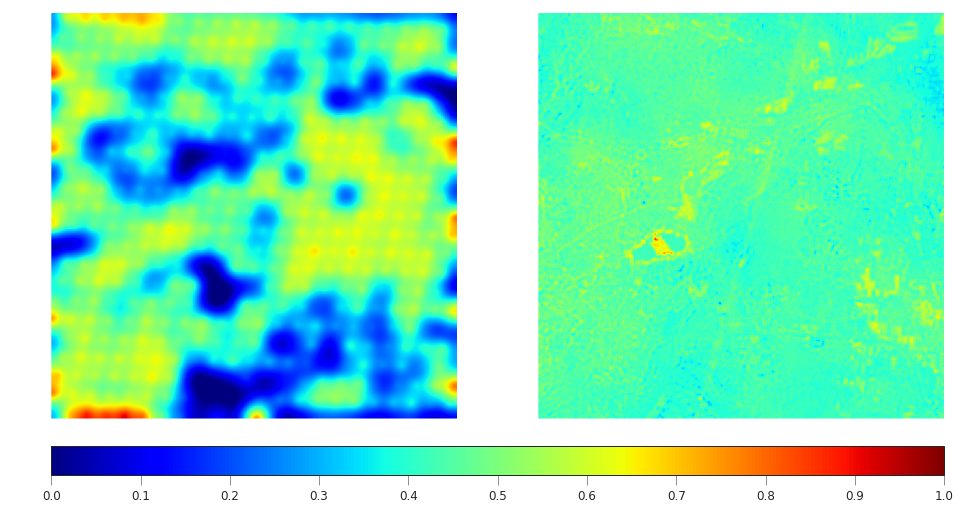

In [89]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(sm_w[0]*10, vmax = 1, vmin=0, interpolation='None')
ax2 = fig.add_subplot(1,2,2)
im = ax2.imshow(senwatpatch, vmax = 1, vmin = 0, interpolation='None')
ax1.axis('off')
ax2.axis('off')
fig.subplots_adjust(bottom=0.1)
cbar_ax = fig.add_axes([0.125, 0.05, 0.775, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

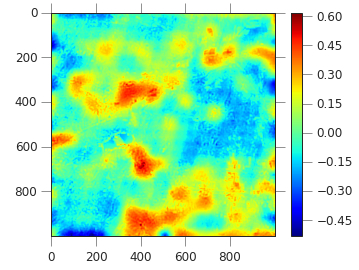

In [91]:
plt.imshow(senwatpatch-sm_w[0]*10)
plt.colorbar()